<a href="https://colab.research.google.com/github/amyfthau/CFGSum23D1G4/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount drive, change directory etc


In [146]:
# Import relevant libraries to mount drive
from google.colab import drive
import os
# Mount google drive
drive.mount('/content/drive')

# Define the path to your specific folder
specific_folder_path = '/content/drive/MyDrive/CFGdegree_Sum23_D1_G4'

# Navigate to the specific folder
os.chdir(specific_folder_path)

# Change directory to shared group folder
%cd /content/drive/MyDrive/CFGdegree_Sum23_D1_G4




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


# Import Relevant Libraries

In [147]:
# Importing necessary libraries for data manipulation, analysis, and visualization
import pandas as pd  # For data manipulation and analysis
import requests  # For making HTTP requests
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization

# Importing specific modules/functions from libraries
from datetime import datetime  # For working with date and time data

# Importing statistical and time series analysis libraries
from statsmodels.tsa.stattools import adfuller  # For performing Augmented Dickey-Fuller test
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For autocorrelation and partial autocorrelation plots
from statsmodels.tsa.exponential_smoothing.ets import ETSModel  # For Exponential Smoothing (ETS) model
from statsmodels.tsa.arima_model import ARIMA  # For Autoregressive Integrated Moving Average (ARIMA) model
from statsmodels.tsa.statespace.sarimax import SARIMAX  # For Seasonal ARIMA (SARIMA) model
import statsmodels.api as sm  # For advanced statistical models and tests

# Importing preprocessing and machine learning libraries
from sklearn import preprocessing  # For data preprocessing tasks
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import mean_absolute_error, mean_squared_error  # For evaluating model performance

# Importing specific modules/functions for time series analysis
from statsmodels.tsa.holtwinters import ExponentialSmoothing  # For Holt-Winters Exponential Smoothing
from sklearn.ensemble import RandomForestRegressor  # For Random Forest regression
from sklearn.model_selection import TimeSeriesSplit  # For creating time series cross-validation splits
from sklearn.preprocessing import MinMaxScaler  # For feature scaling

# # Importing deep learning libraries for time series analysis
# from tensorflow.keras.models import Sequential  # For creating a sequential neural network model
# from tensorflow.keras.layers import LSTM, Dense  # For adding LSTM and Dense layers to the neural network

!pip install pmdarima

# Importing specific functions from libraries for hyperparameter tuning
from pmdarima import auto_arima  # For automatic ARIMA model selection
from keras.wrappers.scikit_learn import KerasRegressor  # For using Keras models in Scikit-Learn GridSearchCV
# from scikeras.wrappers import KerasRegressor  # Alternative wrapper for using Keras models

# Adding an additional import for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor  # For Random Forest regression
from sklearn.model_selection import GridSearchCV

from statsmodels.tsa.api import VAR


# Functions

In [148]:
# Conduct Dickey-Fuller Test
#Ho: It is non stationary
#H1: It is stationary


def adfuller_test(data, column_name):
    """
    Conducts the Dickey-Fuller test to check for stationarity of a time series.

    Args:
        data (pandas.Series): The time series data to be tested.
        column_name (str): The name of the column being tested.

    Returns:
        None
    """
    result = adfuller(data)
    labels = ['ADF Test Statistic', 'p-value', 'Lags Used in The Test', 'Number of Observations Used']

    print(f"Results for column: {column_name}")

    for value, label in zip(result, labels):
        print(label + ': ' + str(value))

    if result[1] <= 0.05:
        print("P value is less than 0.05, so we can reject the null hypothesis (Ho). The series is stationary.")
        print("***********************\n")
    else:
        print("Weak evidence against null hypothesis. The series has a unit root and is not stationary.")
        print("***********************\n")


# Function to plot ACF and PACF
# Function to plot ACF and PACF
def plot_acf_pacf(data_series, max_lags=24):
    """
    Plot Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF).

    Args:
        data_series (pandas.Series): The time series data.
        max_lags (int): Maximum number of lags to show in the plots.

    Returns:
        None
    """

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

    # Plot Autocorrelation Function (ACF)
    plot_acf(data_series, lags=max_lags, ax=ax1)
    ax1.set_xlim(0, max_lags)
    ax1.set_xlabel("Lags", fontsize=12)
    ax1.set_ylabel("ACF", fontsize=12)
    ax1.set_title("Autocorrelation Function (ACF)", fontsize=14)

    # Plot Partial Autocorrelation Function (PACF)
    plot_pacf(data_series, lags=max_lags, ax=ax2)
    ax2.set_xlim(0, max_lags)
    ax2.set_ylim(-1, 1)
    ax2.set_xlabel("Lags", fontsize=12)
    ax2.set_ylabel("PACF", fontsize=12)
    ax2.set_title("Partial Autocorrelation Function (PACF)", fontsize=14)

    plt.tight_layout()
    plt.show()

# Function to filter data for a specific region
def filter_region_data(data_frame, region_name):
    """
    Filter the data for a specific region.

    Args:
        data_frame (pandas.DataFrame): The DataFrame containing the UKHPI data.
        region_name (str): The name of the region to filter.

    Returns:
        pandas.DataFrame: The filtered data for the specified region.
    """
    return data_frame[data_frame['RegionName'] == region_name]

# Function to plot a specified column for a region
def plot_column_into_line_graph(data_frame, region_name, column_name):
    """
    Plot a specified column for a region.

    Args:
        data_frame (pandas.DataFrame): The DataFrame containing the UKHPI data.
        region_name (str): The name of the region to plot.
        column_name (str): The name of the column to plot.

    Returns:
        None
    """
    region_data = filter_region_data(data_frame, region_name)

    region_data.plot(x='Date', y=column_name, marker='o', markersize = '2', linewidth='2')

    plt.xlabel("Date", fontsize=15)
    # Rotate the tick labels vertically
    plt.xticks(rotation=45)
    plt.ylabel(column_name, fontsize=15)
    plt.title(f"{column_name} per Month for {region_name}", fontsize=16)

    plt.show()


# # Define LSTM model creation function
# def create_lstm_model():
#     model = Sequential()
#     model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mean_squared_error')
#     return model



# Import relevant data

In [149]:
# Specify the file path for the UK House Price Index (UKHPI) data
data_path = '/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/'
UKHPI2022_endpoint = 'UK-HPI-full-file-2022-01.csv'
uk_weighted_avg_df_endpoint = 'uk_weighted_avg_per_datecleaned.csv'

# Read the UKHPI data into a DataFrame
UKHPI2022_df = pd.read_csv(data_path + UKHPI2022_endpoint)
uk_weighted_avg_df = pd.read_csv(data_path + uk_weighted_avg_df_endpoint)

# Display the contents of the DataFrames
print(UKHPI2022_df.head())
print(uk_weighted_avg_df.head())


         Date     RegionName   AreaCode  AveragePrice      Index  IndexSA  \
0  01/01/2004  Aberdeenshire  S12000034   81693.66964  40.864214      NaN   
1  01/02/2004  Aberdeenshire  S12000034   81678.76231  40.856757      NaN   
2  01/03/2004  Aberdeenshire  S12000034   83525.09702  41.780317      NaN   
3  01/04/2004  Aberdeenshire  S12000034   84333.67900  42.184780      NaN   
4  01/05/2004  Aberdeenshire  S12000034   86379.95396  43.208353      NaN   

   1m%Change  12m%Change  AveragePriceSA  SalesVolume  ...     NewPrice  \
0        NaN         NaN             NaN        388.0  ...  88436.13953   
1  -0.018248         NaN             NaN        326.0  ...  88606.44649   
2   2.260483         NaN             NaN        453.0  ...  90296.91375   
3   0.968071         NaN             NaN        571.0  ...  90319.87844   
4   2.426403         NaN             NaN        502.0  ...  91989.17763   

    NewIndex  New1m%Change  New12m%Change  NewSalesVolume     OldPrice  \
0  40.267250

Plot average prices for "Ashford" first

# Import Variables

In [150]:
# Read the CSV file into a DataFrame and set 'Date' column as index
data_df = pd.read_csv('/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/2023-08-23_merged_data_cleaned.csv', parse_dates=['Date'], index_col='Date')
data_df.head(100)

# Create a DataFrame to store original levels
original_levels_df = data_df.copy()

# Display summary information about the DataFrame
data_df.info()
# Check for NaN values and count them for each column
nan_counts = data_df.isna().sum()
# Print the NaN counts
print(nan_counts)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 2010-01-01 to 2021-01-01
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AvgPriceUK_monthly  133 non-null    float64
 1   IntRate_monthly     133 non-null    float64
 2   CPIH_monthly        133 non-null    float64
 3   URate_monthly       133 non-null    float64
 4   ConsOutput_monthly  133 non-null    int64  
 5   Population_monthly  133 non-null    float64
 6   GDP_monthly         133 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 8.3 KB
AvgPriceUK_monthly    0
IntRate_monthly       0
CPIH_monthly          0
URate_monthly         0
ConsOutput_monthly    0
Population_monthly    0
GDP_monthly           0
dtype: int64


# Make stationary data

1. Calculating Growth Rates: The percentage change has been calculated (growth rates) for each of the non-stationary variables (AvgPriceUK_monthly, CPIH_monthly, ConsOutput_monthly, Population_monthly, GDP_monthly) using the .pct_change() method. This calculates the percentage change between the current value and the previous value.

2. Removing NaN Values: After calculating the growth rates, rows that contain NaN (Not a Number) values have been dropped using the .dropna() method. NaN values can arise from the percentage change calculation, especially when there are missing or zero values in the original data.

3. Checking Data Information: Using .info() information about the DataFrame has been printed to get an overview of the data, including the number of non-null entries and data types.

4. Checking for NaN Values: The .isna().sum() method has been used to count the number of NaN values in each column. This helps you identify if there are any missing values left after your preprocessing steps.

5. Handling Infinite Values: Infinite values (inf and -inf) have been replaced with NaN values using the .replace() method. Infinite values can occur when you have zero values in the denominator during the percentage change calculation.

These preprocessing steps are essential to ensure that the data is in a clean and usable format for modeling.

In [151]:
nonstationary_variables = ["AvgPriceUK_monthly","CPIH_monthly", "ConsOutput_monthly","Population_monthly", "GDP_monthly"]

# Loop through the variables and calculate the growth rates
for variable in nonstationary_variables:
    data_df[variable + "_growth"] = data_df[variable].pct_change() * 100

# Drop rows with NaN values in any of the columns
data_df.dropna(inplace=True)
# Print the DataFrame
print(data_df)
data_df.head(100)

# Display summary information about the DataFrame
data_df.info()
# Check for NaN values and count them for each column
nan_counts = data_df.isna().sum()
# Print the NaN counts
print(nan_counts)
# Check for and replace inf and -inf values with NaN
data_df.replace([np.inf, -np.inf], np.nan, inplace=True)

            AvgPriceUK_monthly  IntRate_monthly  CPIH_monthly  URate_monthly  \
Date                                                                           
2010-02-01       177113.356687              0.5          89.0            8.0   
2010-03-01       176527.571509              0.5          89.4            8.0   
2010-04-01       177819.436745              0.5          89.9            7.9   
2010-05-01       178876.091169              0.5          90.1            7.9   
2010-06-01       180230.621649              0.5          90.2            7.8   
...                        ...              ...           ...            ...   
2020-09-01       251367.682804              0.1         109.2            5.1   
2020-10-01       251484.842313              0.1         109.2            5.1   
2020-11-01       254290.801464              0.1         109.1            5.2   
2020-12-01       258490.866031              0.1         109.4            5.1   
2021-01-01       261778.374214          

The data is already detrended because we're looking at growth rates so the data is stationary.

# Test for stationarity

Results for column: IntRate_monthly
ADF Test Statistic: -1.8324133198054844
p-value: 0.36449221622597533
Lags Used in The Test: 0
Number of Observations Used: 131
Weak evidence against null hypothesis. The series has a unit root and is not stationary.
***********************

Results for column: CPIH_monthly
ADF Test Statistic: -0.6484036507265897
p-value: 0.8596655110762415
Lags Used in The Test: 12
Number of Observations Used: 119
Weak evidence against null hypothesis. The series has a unit root and is not stationary.
***********************

Results for column: URate_monthly
ADF Test Statistic: -1.1274616728811973
p-value: 0.7039972075525565
Lags Used in The Test: 2
Number of Observations Used: 129
Weak evidence against null hypothesis. The series has a unit root and is not stationary.
***********************

Results for column: ConsOutput_monthly
ADF Test Statistic: -1.3005321662960478
p-value: 0.6289288117961958
Lags Used in The Test: 12
Number of Observations Used: 119
Weak evid

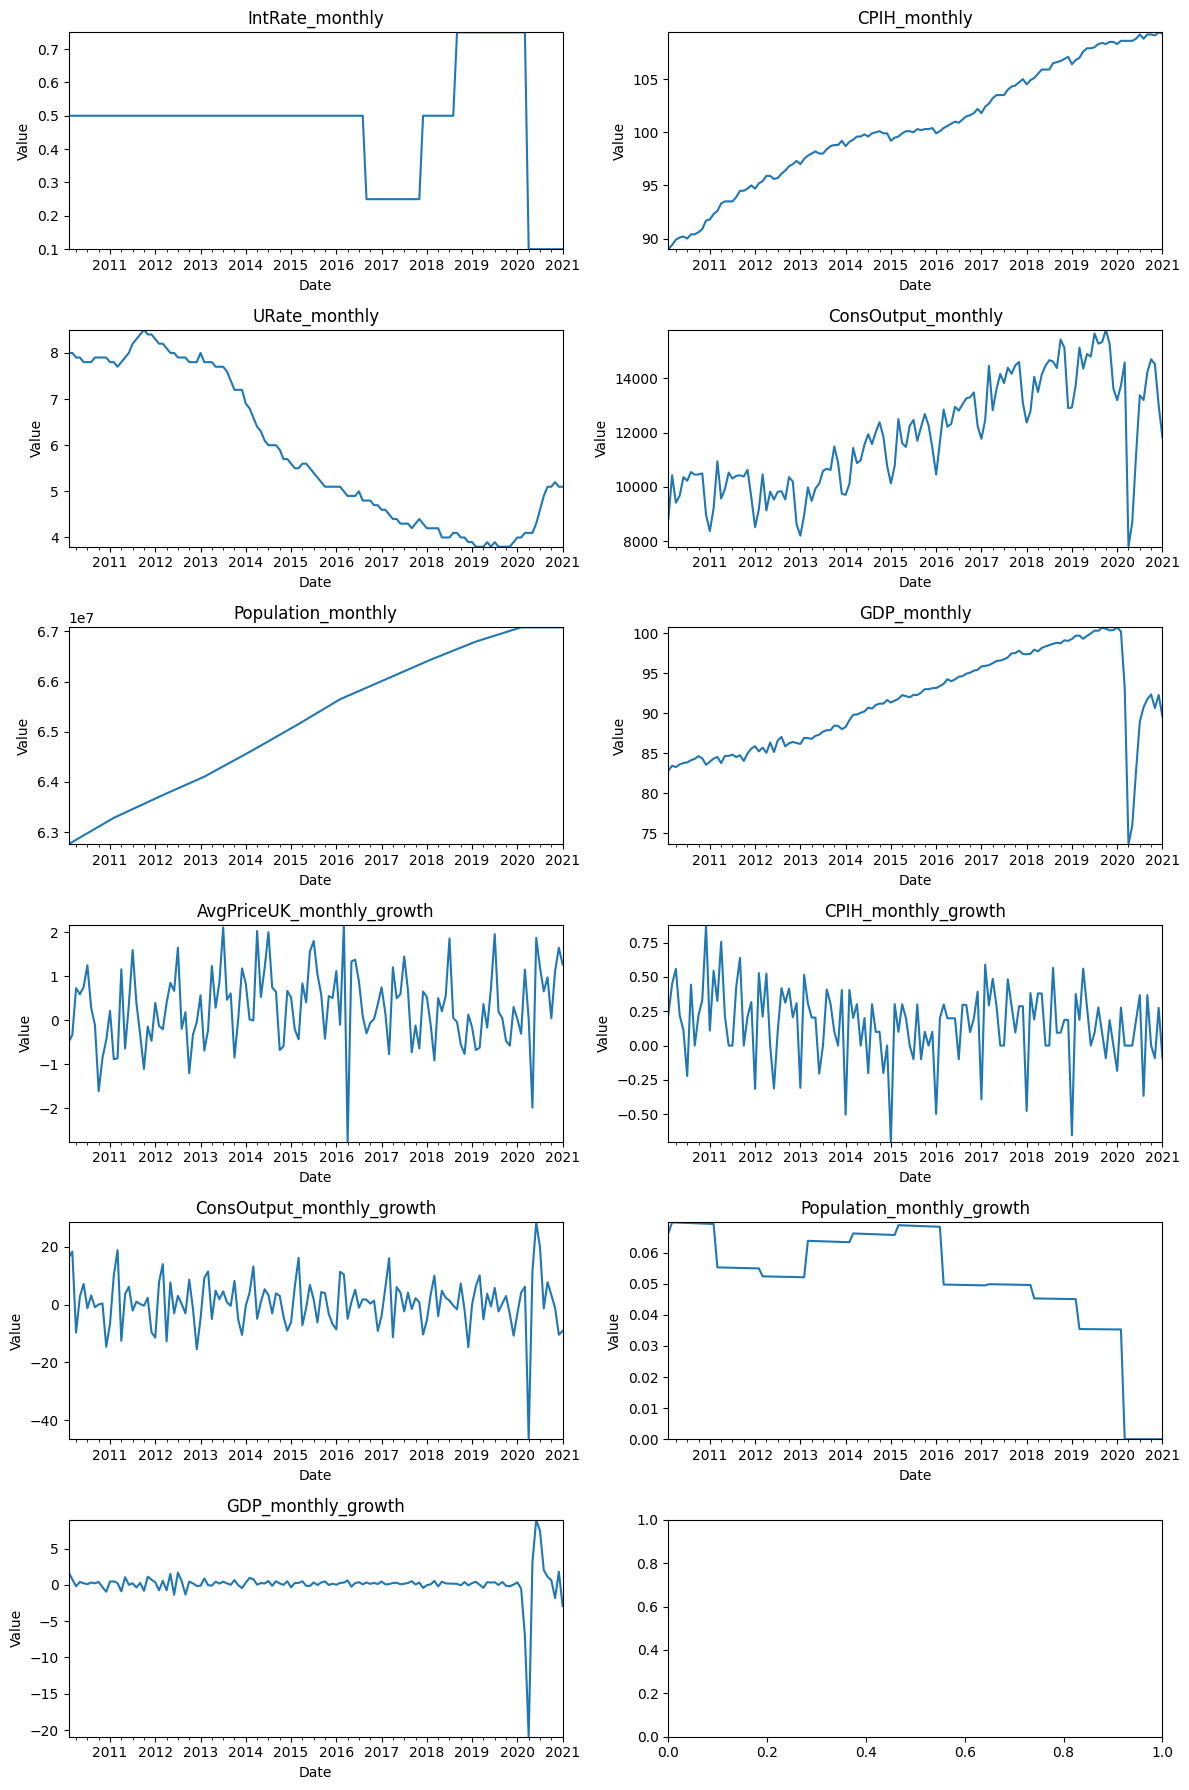

In [127]:
# Create a 6x2 grid of subplots
fig, axes = plt.subplots(6, 2, figsize=(12, 18))
fig.subplots_adjust(hspace=0.5)

# Apply the adfuller_test function and plot for each variable
for idx, variable in enumerate(data_df.columns[1:]):  # Skip 'Date' column
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    adfuller_test(data_df[variable], variable)

    # Plot the data
    data_df[variable].plot(ax=ax)
    ax.set_title(variable)
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.set_ylim(np.nanmin(data_df[variable]), np.nanmax(data_df[variable]))  # Adjust y-axis limits

plt.tight_layout()
plt.show()

# Check parameters eg ACF, PACF

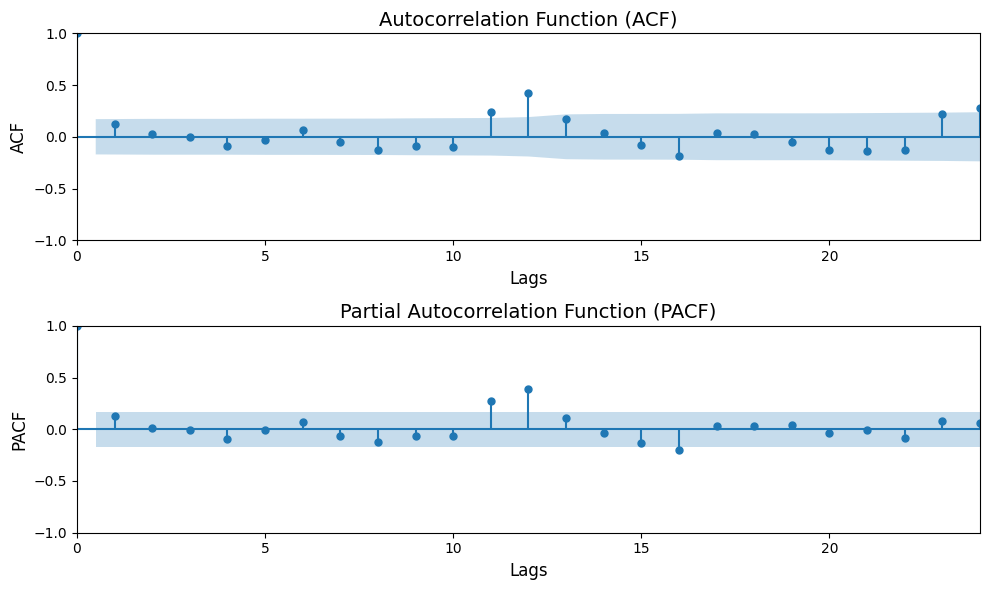

In [128]:
# Call the plot_acf_pacf function for AvgPriceUK_monthly_growth column
plot_acf_pacf(data_df['AvgPriceUK_monthly_growth'])

Autoregressive (AR) Component (p):
Look at the PACF plot. The lag at which the PACF cuts off or becomes close to zero can suggest the value of p. If the PACF cuts off after lag k, then you might consider an AR(p) term in your model.
Moving Average (MA) Component (q):
Look at the ACF plot. The lag at which the ACF cuts off or becomes close to zero can suggest the value of q. If the ACF cuts off after lag k, then you might consider an MA(q) term in your model.


1. The positive autocorrelation at the first and second lags (lags 1 and 2) around 0.25 suggests that there is a moderate positive correlation between the current observation and observations at these lags. This might indicate a recurring pattern every 1 or 2 periods.
The negative autocorrelation at the third lag (lag 3) around -0.25 indicates that there is a moderate negative correlation between the current observation and the observation three periods ago. This could suggest an alternating pattern The positive partial autocorrelation at the first lag suggests a strong direct relationship between the current observation and the observation at the first lag. This is typical of an autoregressive (AR) component in a time series model.The positive partial autocorrelation at the second lag indicates that there is still some correlation between the current observation and the observation two periods ago, even after accounting for the first lag. This could also be indicative of an AR component. The negative partial autocorrelation at the third lag suggests that there is a negative relationship between the current observation and the observation three periods ago, once the influence of the first two lags has been removed. This pattern may suggest a seasonal or moving average (MA) component.



2. Peaks and troughs of the ACF curve that alternate in a regular pattern suggest the presence of seasonality.
It's important to consider seasonality when modeling time series data, as it can impact the choice of forecasting models and the interpretation of results. Seasonal patterns may need to be addressed through techniques such as seasonal decomposition, differencing, or incorporating seasonal terms in forecasting models like Seasonal Autoregressive Integrated Moving Average (SARIMA) or Seasonal Exponential Smoothing (ETS).


Correlation being significant around 12 lags (1 year) and the presence of sine waves every 6 months indicate that your time series data might have a seasonal pattern with a yearly cycle.

If you observe significant autocorrelation at lag 12 and sinusoidal patterns every 6 months, this suggests that your time series data could be seasonal with a yearly cycle. You might want to consider applying seasonal decomposition techniques or using seasonal models like SARIMA (Seasonal Autoregressive Integrated Moving Average) to model and forecast this data.

Keep in mind that the interpretation of ACF and PACF plots can guide you in selecting appropriate time series models and making informed decisions about data transformations or model specifications.






# Modelling notes


Both SARIMA (Seasonal Autoregressive Integrated Moving Average) and ETS (Exponential Smoothing State Space Model) are time series forecasting methods that are commonly used to model and predict future values in time series data. However, they use different approaches and assumptions to achieve their predictions:

SARIMA (Seasonal ARIMA):

SARIMA is an extension of the ARIMA (Autoregressive Integrated Moving Average) model that includes seasonal components.
It is designed to capture both the autoregressive (AR) and moving average (MA) patterns in the data, as well as the seasonality present in the time series.
SARIMA models consider the order of differencing (d), autoregressive order (p), moving average order (q), seasonal differencing (D), seasonal autoregressive order (P), and seasonal moving average order (Q) as parameters.
It's well-suited for time series data with trends and seasonality.
ETS (Exponential Smoothing State Space Model):

ETS is based on the idea of exponential smoothing, which gives different weights to different observations in the past.
ETS models include three main components: error (E), trend (T), and seasonality (S).
ETS models can be classified into various types, such as ETS(AAA), ETS(AAd), ETS(MMM), etc., each with different assumptions about the presence and combination of error, trend, and seasonality.
ETS models are suitable for forecasting time series with various patterns, including trend, seasonality, and irregular fluctuations.
Key differences between SARIMA and ETS:

Model Structure:

SARIMA focuses on the autoregressive and moving average patterns, and it extends ARIMA to include seasonal components.
ETS is based on exponential smoothing and uses a combination of error, trend, and seasonality components.
Model Assumptions:

SARIMA assumes that the data has autoregressive and moving average patterns, and it captures these patterns through differencing and lagged terms.
ETS assumes that future observations are influenced by the error, trend, and seasonality in the past observations, and it assigns different weights to different historical observations.
Complexity:

SARIMA models can become complex as the number of parameters increases with the inclusion of seasonal components and lags.
ETS models are generally simpler in terms of parameter estimation and interpretation.
Application:

SARIMA is suitable for time series data with clear trends and seasonality, where the patterns are more linear.
ETS is more flexible and can handle various time series patterns, making it suitable for data with nonlinear trends, changing seasonality, and irregular fluctuations.
Both methods have their strengths and weaknesses, and the choice between SARIMA and ETS often depends on the nature of the time series data and the patterns you're trying to capture.

SARIMA might be more suitable if:

Seasonality and Trends: If your house price growth data shows clear seasonal patterns (e.g., prices tend to rise during certain months or quarters) and long-term trends (overall increasing or decreasing prices), SARIMA could be a good choice. It can capture both the seasonal patterns and the trend through its seasonal and autoregressive components.

Complex Patterns: If your data has complex interactions between lagged values, seasonality, and trends, SARIMA's ability to handle multiple autoregressive and moving average terms may be beneficial.

Stationarity: If your data is not stationary and requires differencing to achieve stationarity, SARIMA's differencing and integration components can help handle this.

ETS might be more suitable if:

Changing Patterns: If your house price growth data exhibits changing patterns over time, such as varying seasonality or trends, ETS might be a better fit. ETS models can adapt to changing patterns more flexibly.

Simplicity: If your data doesn't have highly complex patterns and you're looking for a simpler model, ETS could be a good choice due to its relatively straightforward structure.

Irregular Fluctuations: If your data contains irregular fluctuations that don't follow a specific autoregressive or moving average pattern, ETS models can capture these irregularities effectively.

Limited Historical Data: If you have limited historical data, ETS might be more suitable as it doesn't require as many historical observations as SARIMA, especially for models with high order parameters.

Interpretability: If you value model interpretability and ease of parameter interpretation, ETS models tend to have fewer parameters than SARIMA.

In practice, it's a good idea to try both SARIMA and ETS models and compare their performance. You can use techniques like cross-validation to evaluate the accuracy of their forecasts on a holdout dataset. Ultimately, the choice between the two methods depends on how well they capture the underlying patterns in your specific house price growth data.
LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) that is well-suited for handling sequences of data like time series. ARIMA (AutoRegressive Integrated Moving Average) and ETS (Exponential Smoothing State Space Model) are classical time series forecasting methods, and Random Forest is a machine learning ensemble algorithm. Each of these methods has its own strengths and weaknesses, and the choice between them depends on various factors including the nature of your data and your forecasting goals. Here's a comparison of these methods:

LSTM:

Strengths:
Can capture complex temporal dependencies in data.
Can handle long sequences and non-linear relationships.
Able to model both trend and seasonality in the data.
Weaknesses:
Requires a large amount of data to train effectively.
Can be computationally expensive to train.
Prone to overfitting if not properly regularized.
ARIMA:

Strengths:
Well-suited for univariate time series data.
Can capture auto-regressive (AR) and moving average (MA) patterns.
Generally interpretable and intuitive to understand.
Weaknesses:
Assumes that the data is stationary, which might require pre-processing.
May not handle non-linear relationships well.
Doesn't handle external factors or multiple correlated variables easily.
ETS:

Strengths:
Good for capturing simple trend and seasonality patterns.
Can be more robust to outliers and irregular data.
Handles multiple seasonalities well (in ETS-M and ETS-M-Adaptive models).
Weaknesses:
May not perform well with complex and changing patterns.
Less flexible compared to other methods.
Interpretability can be limited, especially for more advanced ETS models.
Random Forest:

Strengths:
Can handle complex relationships between features.
Able to capture interactions between variables.
Generally robust to outliers and noise.
Weaknesses:
May not capture temporal dependencies well without additional preprocessing.
Doesn't handle seasonality and autocorrelation natively.
Hyperparameter tuning can be challenging.
In summary, the choice between LSTM, ARIMA, ETS, and Random Forest depends on your data characteristics, the complexity of patterns you want to capture, the amount of available data, and your computational resources. For time series forecasting, ARIMA and ETS are often used when the data exhibits clear trend and seasonality, while LSTM is suitable for capturing complex temporal dependencies. Random Forest can be a good choice when dealing with multiple features and interactions, but it might not capture time-related patterns as effectively as the other methods

# Model 1a: SARIMA - univariate

## Forecast changes

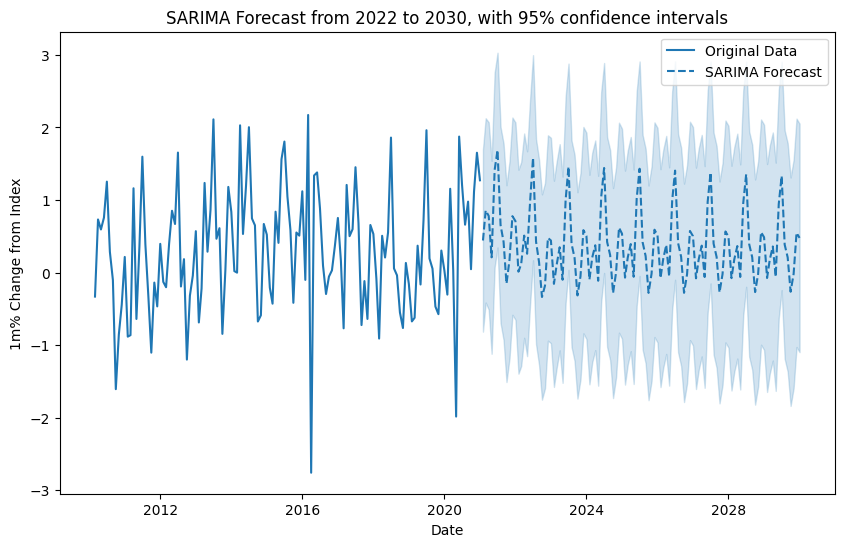

[ 0.44235116  0.85682554  0.78089283  0.2102405   1.41352308  1.68811079
  0.65517273  0.42407628 -0.15257913  0.17467823  0.77759379  0.70949502
  0.01227798  0.11692541  0.50921918  0.25977636  0.98104134  1.58292487
  0.42566089  0.14291829 -0.33678207 -0.17990098  0.47718151  0.44211047
 -0.15524061  0.10620616  0.34903747 -0.09879937  0.99966295  1.4587017
  0.39798963  0.20424952 -0.31484555 -0.05167964  0.58496727  0.50622508
 -0.09640835  0.20899613  0.37629847 -0.11254992  1.04171848  1.4416209
  0.42194885  0.24126462 -0.28230306  0.00267921  0.61866417  0.53609082
 -0.06944263  0.20746755  0.39261045 -0.05776179  1.0188022   1.4311934
  0.41790183  0.22780822 -0.27966665 -0.015693    0.59092758  0.51640738
 -0.07646661  0.18808538  0.38104425 -0.05383246  0.99217781  1.40540714
  0.4060559   0.21763306 -0.27896523 -0.02371548  0.57390506  0.50153601
 -0.07906659  0.18432698  0.37096341 -0.0608372   0.97567544  1.37894268
  0.39849767  0.215198   -0.27386231 -0.02064523  0.56

In [136]:
# Choose the column to model
column_name = 'AvgPriceUK_monthly_growth'
data_series = data_df[column_name]

# SARIMA Parameters
p = 4  # autoregressive order - repeating pattern every 4 lags
d = 0  # no differencing as made stationary
q = 1  # moving order average
P = 3  # quarterly seasonality
D = 0  # no adjustment for stationarity
Q = 1
s = 12  # seasonal period

# Set the frequency of the DataFrame to 'MS' (Monthly Start)
data_df.index.freq = 'MS'

# Fit the SARIMA model
SARIMA_model = SARIMAX(data_series, order=(p, d, q), seasonal_order=(P, D, Q, s))
SARIMA_results = SARIMA_model.fit(maxiter=1000)

# Forecast future values until 2030
forecast_steps = 12 * (2030 - 2022 + 1)  # Number of steps to forecast (2022 to 2030)
SARIMA_forecast = SARIMA_results.get_forecast(steps=forecast_steps)
confidence_intervals = SARIMA_forecast.conf_int()

# Plot the original data, forecast, and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(data_series.index, data_series.values, label='Original Data')
plt.plot(SARIMA_forecast.predicted_mean.index, SARIMA_forecast.predicted_mean.values, color='#1f77b4', linestyle='--', label='SARIMA Forecast')
plt.fill_between(SARIMA_forecast.predicted_mean.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='#1f77b4', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('1m% Change from Index')
plt.title('SARIMA Forecast from 2022 to 2030, with 95% confidence intervals')
plt.legend()
plt.show()

print(SARIMA_forecast.predicted_mean.values)


## Levels

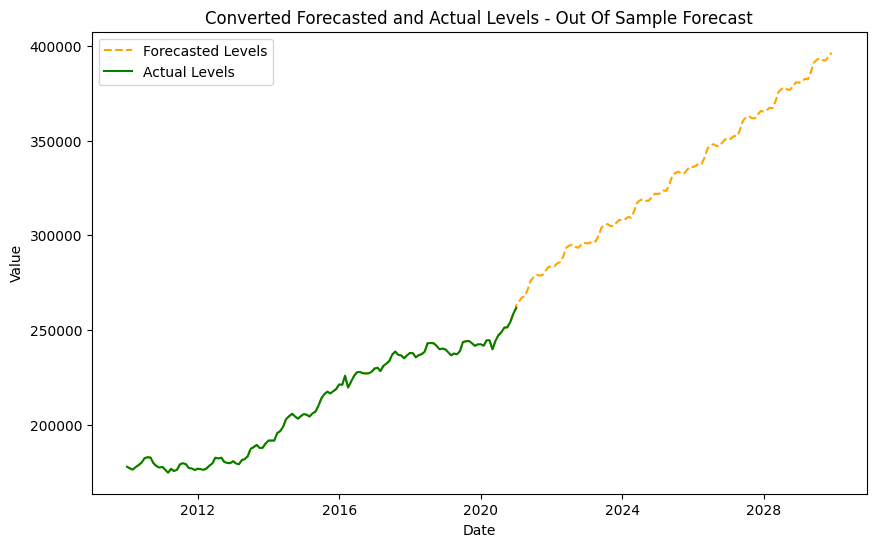

In [137]:
# Convert forecasted percentage changes back to levels
SARIMA_forecasted_levels = original_levels_df['AvgPriceUK_monthly'].iloc[-1] * (1 + SARIMA_forecast.predicted_mean / 100).cumprod()

# Generate a range of dates for the forecasted levels until 2030
forecasted_dates = pd.date_range(start=data_df.index[-1], periods=len(SARIMA_forecasted_levels), freq='MS')

# Create a DataFrame for the forecasted levels until 2030
SARIMA_forecasted_levels_df = pd.DataFrame({'AvgPriceUK_monthly': SARIMA_forecasted_levels.values}, index=forecasted_dates)

# Concatenate the actual levels and forecasted levels DataFrames until 2030
SARIMA_combined_levels_df = pd.concat([original_levels_df, SARIMA_forecasted_levels_df])

# Plot the combined forecasted and actual levels until 2030
plt.figure(figsize=(10, 6))
plt.plot(SARIMA_combined_levels_df.index, SARIMA_combined_levels_df['AvgPriceUK_monthly'], color='orange', linestyle='--', label='Forecasted Levels')
plt.plot(original_levels_df.index, original_levels_df['AvgPriceUK_monthly'], color='green', linestyle='-', label='Actual Levels')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Converted Forecasted and Actual Levels - Out Of Sample Forecast')
plt.legend()
plt.show()


## Model Evaluation


Mean Absolute Percentage Error (MAPE) might not be the most appropriate metric when you are forecasting small percentage changes, especially if the values are close to zero. This is because MAPE can be heavily influenced by small denominators (the actual values) and can lead to high values when the actual values are close to zero. In such cases, a small absolute forecast error can result in a large percentage error.

For small percentage changes, you might want to consider using alternative metrics that are more suitable and robust. Here are a couple of options:

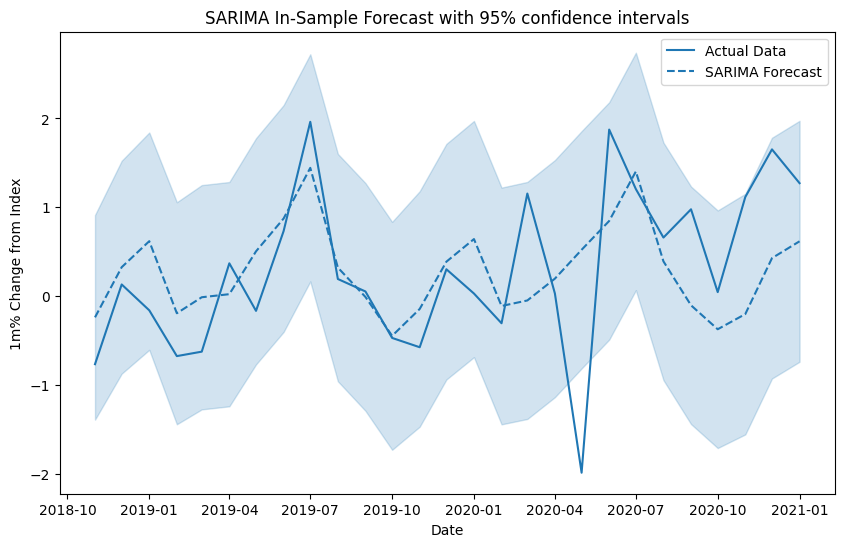

Root Mean Squared Error (RMSE): 0.79


In [ ]:
# Split the data_series into training and testing sets (80% for training)
train_data, test_data = train_test_split(data_series, test_size=0.2, shuffle=False)

# Fit the SARIMA model on the training data
SARIMA_model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
SARIMA_results = SARIMA_model.fit(maxiter=1000)

# Forecast future values (in-sample forecast, so steps match the length of test_data)
forecast_steps = len(test_data)
SARIMA_forecast = SARIMA_results.get_forecast(steps=forecast_steps)
confidence_intervals = SARIMA_forecast.conf_int()

# Plot the original data, forecast, and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data.values, label='Actual Data')
plt.plot(SARIMA_forecast.predicted_mean.index, SARIMA_forecast.predicted_mean.values, color='#1f77b4', linestyle='--', label='SARIMA Forecast')
plt.fill_between(SARIMA_forecast.predicted_mean.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='#1f77b4', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('1m% Change from Index')
plt.title('SARIMA In-Sample Forecast with 95% confidence intervals')
plt.legend()
plt.show()

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(test_data, SARIMA_forecast.predicted_mean)
# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


# Model 1b: SARIMA optimised

## Forecast Changes

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=301.753, Time=3.01 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=337.131, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=308.106, Time=0.41 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=319.047, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=350.111, Time=0.06 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=320.800, Time=1.17 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=309.797, Time=0.63 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=4.92 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=7.80 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=339.038, Time=0.28 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=314.282, Time=2.46 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=309.078, Time=2.57 sec
 ARIMA(1,0,1)(2,0,2)[12] intercept   : AIC=304.472, Time=7.09 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=300.268, Time=2.31 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AI

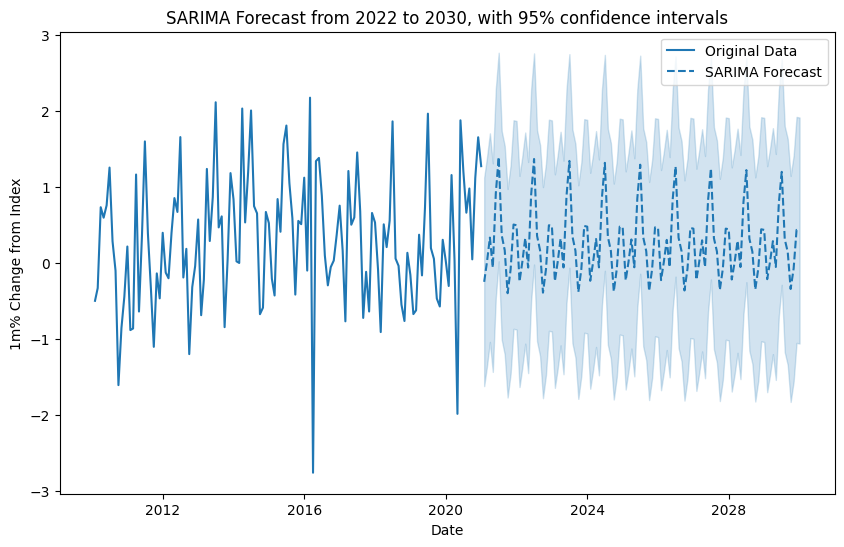

In [ ]:
# Choose the column to model
column_name = 'AvgPriceUK_monthly_growth'
data_series = data_df[column_name]

#Performing stepwise search to minimize aic
# Use auto_arima to determine the best SARIMA parameters
model = auto_arima(data_series, seasonal=True, m=12, stepwise=True, trace=True,
                   start_p=1, max_p=4, start_d=0, max_d=1, start_q=1, max_q=1)
order = model.order
seasonal_order = model.seasonal_order

# Set the frequency of the DataFrame to 'MS' (Monthly Start)
data_df.index.freq = 'MS'

# Fit the SARIMA model with the determined parameters
SARIMA_model = SARIMAX(data_series, order=order, seasonal_order=seasonal_order)
SARIMA_results = SARIMA_model.fit(maxiter=1000)

# Forecast future values until 2030
forecast_steps = 12 * (2030 - 2022 + 1)  # Number of steps to forecast until 2030
SARIMA_forecast = SARIMA_results.get_forecast(steps=forecast_steps)
confidence_intervals = SARIMA_forecast.conf_int()

# Plot the original data, forecast, and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(data_series.index, data_series.values, label='Original Data')
plt.plot(SARIMA_forecast.predicted_mean.index, SARIMA_forecast.predicted_mean.values, color='#1f77b4', linestyle='--', label='SARIMA Forecast')
plt.fill_between(SARIMA_forecast.predicted_mean.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='#1f77b4', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('1m% Change from Index')
plt.title('SARIMA Forecast from 2022 to 2030, with 95% confidence intervals')
plt.legend()
plt.show()


## Levels

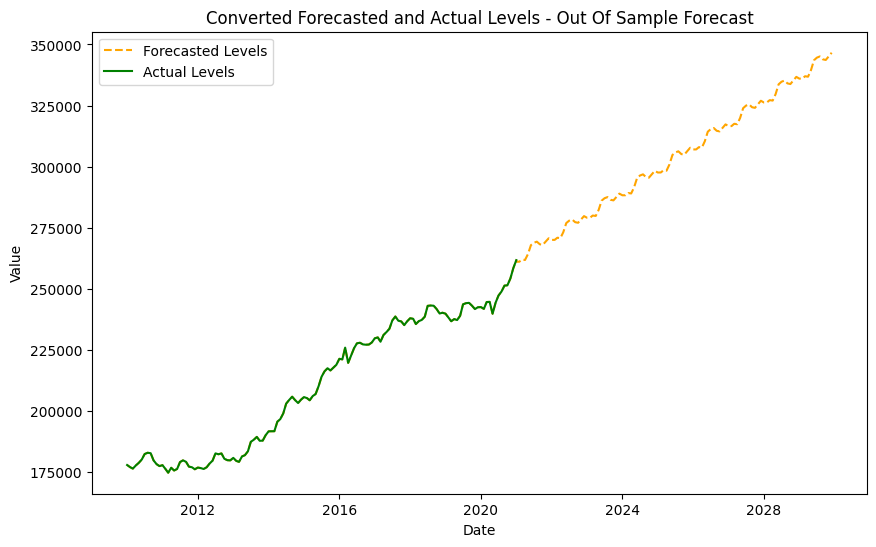

In [ ]:
# Convert forecasted percentage changes back to levels
SARIMA_forecasted_levels = original_levels_df['AvgPriceUK_monthly'].iloc[-1] * (1 + SARIMA_forecast.predicted_mean / 100).cumprod()

# Generate a range of dates for the forecasted levels
forecasted_dates = pd.date_range(start=data_df.index[-1], periods=len(SARIMA_forecasted_levels), freq='MS')

# Create a DataFrame for the forecasted levels
SARIMA_forecasted_levels_df = pd.DataFrame({'AvgPriceUK_monthly': SARIMA_forecasted_levels.values}, index=forecasted_dates)

# Concatenate the actual levels and forecasted levels DataFrames
SARIMA_combined_levels_df = pd.concat([original_levels_df, SARIMA_forecasted_levels_df])

# Plot the combined forecasted and actual levels
plt.figure(figsize=(10, 6))
plt.plot(SARIMA_combined_levels_df.index, SARIMA_combined_levels_df['AvgPriceUK_monthly'], color='orange', linestyle='--', label='Forecasted Levels')
plt.plot(original_levels_df.index, original_levels_df['AvgPriceUK_monthly'], color='green', linestyle='-', label='Actual Levels')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Converted Forecasted and Actual Levels - Out Of Sample Forecast')
plt.legend()
plt.show()

# Print the predicted mean values of the forecast
# print(SARIMA_forecast.predicted_mean.values)

## Model Evaluation

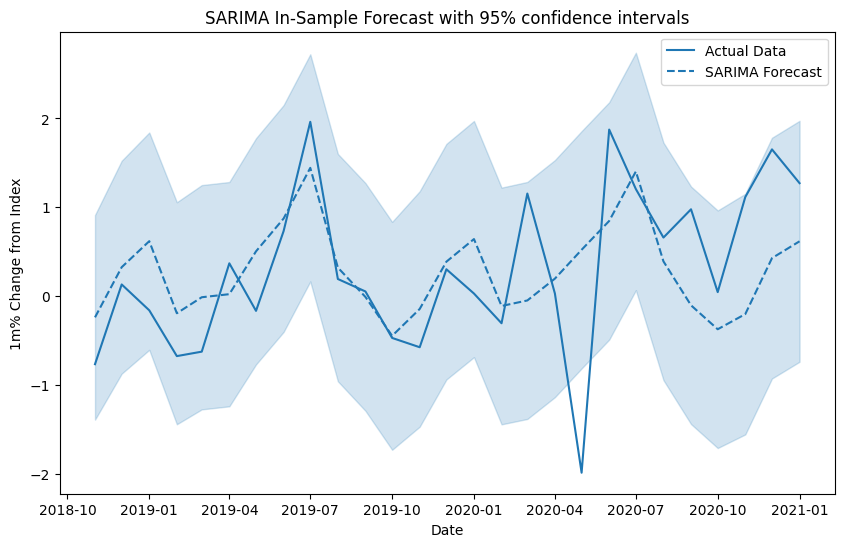

Root Mean Squared Error (RMSE): 0.79


In [ ]:
# Split the data_series into training and testing sets (80% for training)
train_data, test_data = train_test_split(data_series, test_size=0.2, shuffle=False)

# Fit the SARIMA model on the training data
SARIMA_model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
SARIMA_results = SARIMA_model.fit(maxiter=1000)

# Forecast future values (in-sample forecast, so steps match the length of test_data)
forecast_steps = len(test_data)
SARIMA_forecast = SARIMA_results.get_forecast(steps=forecast_steps)
confidence_intervals = SARIMA_forecast.conf_int()

# Plot the original data, forecast, and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data.values, label='Actual Data')
plt.plot(SARIMA_forecast.predicted_mean.index, SARIMA_forecast.predicted_mean.values, color='#1f77b4', linestyle='--', label='SARIMA Forecast')
plt.fill_between(SARIMA_forecast.predicted_mean.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='#1f77b4', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('1m% Change from Index')
plt.title('SARIMA In-Sample Forecast with 95% confidence intervals')
plt.legend()
plt.show()

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(test_data, SARIMA_forecast.predicted_mean)
# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


# Model 2: SARIMAX- cannot produce out of sample so only evaluation can be provided

## Model Evaluation

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=220.064, Time=3.61 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=266.372, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=243.118, Time=0.36 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=253.840, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=276.530, Time=0.03 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=inf, Time=2.20 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=240.338, Time=2.00 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=222.590, Time=6.97 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=222.393, Time=4.17 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=253.008, Time=2.54 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=239.114, Time=2.01 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=6.71 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.82 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=226.66

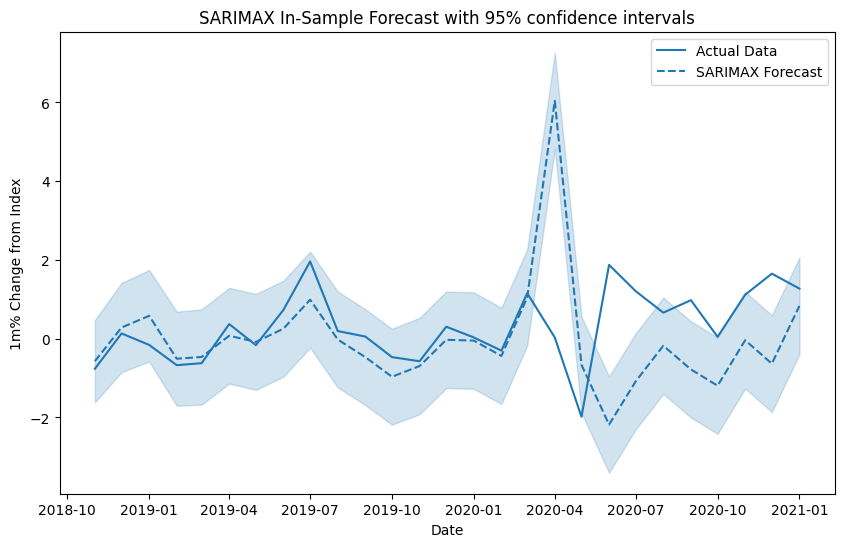

Root Mean Squared Error (RMSE): 1.66


In [ ]:
# Choose the column to model
target_column = 'AvgPriceUK_monthly_growth'
exog_columns = ['IntRate_monthly', 'CPIH_monthly_growth', 'ConsOutput_monthly_growth', 'Population_monthly_growth', 'GDP_monthly_growth']

# Split the data_series into training and testing sets (80% for training)
train_data, test_data = train_test_split(data_df[target_column], test_size=0.2, shuffle=False)
train_exog, test_exog = train_test_split(data_df[exog_columns], test_size=0.2, shuffle=False)

# Use auto_arima to determine the best SARIMAX parameters
model = auto_arima(train_data, exogenous=train_exog, seasonal=True, m=12, stepwise=True, trace=True)
order = model.order
seasonal_order = model.seasonal_order

# Fit the SARIMAX model with the determined parameters
SARIMAX_model = SARIMAX(train_data, exog=train_exog, order=order, seasonal_order=seasonal_order, enforce_invertibility=True)
SARIMAX_results = SARIMAX_model.fit(maxiter=1000)

# Forecast future values (in-sample forecast, so steps match the length of test_data)
forecast_steps = len(test_data)
SARIMAX_forecast = SARIMAX_results.get_forecast(steps=forecast_steps, exog=test_exog)
confidence_intervals = SARIMAX_forecast.conf_int()

# Plot the original data, forecast, and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data.values, label='Actual Data')
plt.plot(SARIMAX_forecast.predicted_mean.index, SARIMAX_forecast.predicted_mean.values, color='#1f77b4', linestyle='--', label='SARIMAX Forecast')
plt.fill_between(SARIMAX_forecast.predicted_mean.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='#1f77b4', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('1m% Change from Index')
plt.title('SARIMAX In-Sample Forecast with 95% confidence intervals')
plt.legend()
plt.show()

# Calculate the Root Mean Squared Error (RMSE) using forecasted levels
forecast_errors = test_data - SARIMAX_forecast.predicted_mean
rmse = np.sqrt(np.mean(forecast_errors**2))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Model 3: Exponential Smoothing (ETS)
Exponential Smoothing methods are suitable for capturing different patterns in the data such as trend and seasonality.

## Forecast changes

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


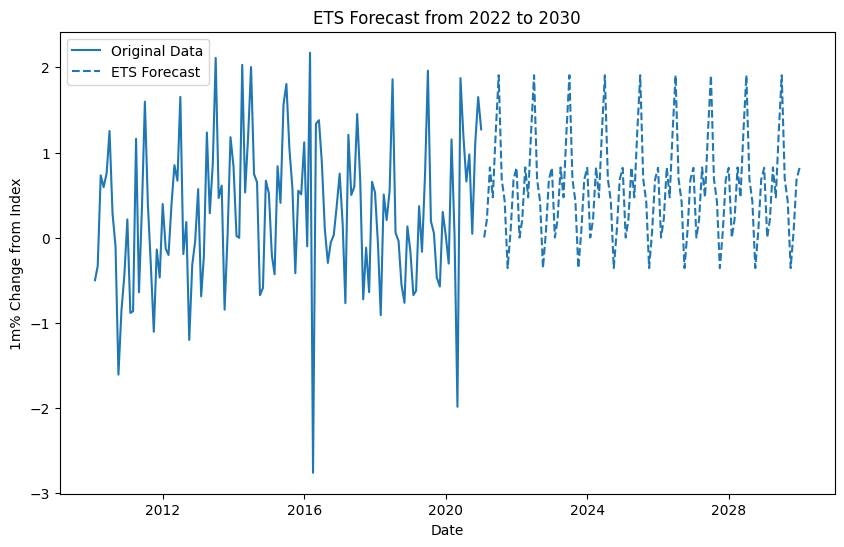

2021-02-01    0.002569
2021-03-01    0.214153
2021-04-01    0.825534
2021-05-01    0.474635
2021-06-01    1.254154
                ...   
2029-09-01    0.426046
2029-10-01   -0.356202
2029-11-01    0.080870
2029-12-01    0.682113
2030-01-01    0.820890
Freq: MS, Name: simulation, Length: 108, dtype: float64
<class 'pandas.core.series.Series'>


In [ ]:
# Choose the column to model
column_name = 'AvgPriceUK_monthly_growth'
data_series = data_df[column_name]

# Fit the ETS model
ETS_model = ETSModel(data_series, error='add', trend=None, seasonal='add', seasonal_periods=12)
ETS_results = ETS_model.fit()

# Forecast future values
forecast_steps = 108  # Number of steps to forecast (2022 to 2030)
forecast_index = pd.date_range(start=data_series.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')
ETS_forecast = ETS_results.forecast(steps=forecast_steps)

# Plot the original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(data_series.index, data_series.values, label='Original Data')
plt.plot(forecast_index, ETS_forecast, color='#1f77b4', linestyle='--', label='ETS Forecast')
plt.xlabel('Date')
plt.ylabel('1m% Change from Index')
plt.title('ETS Forecast from 2022 to 2030')
plt.legend()
plt.show()

print(ETS_forecast)
print(type(ETS_forecast))


## Levels

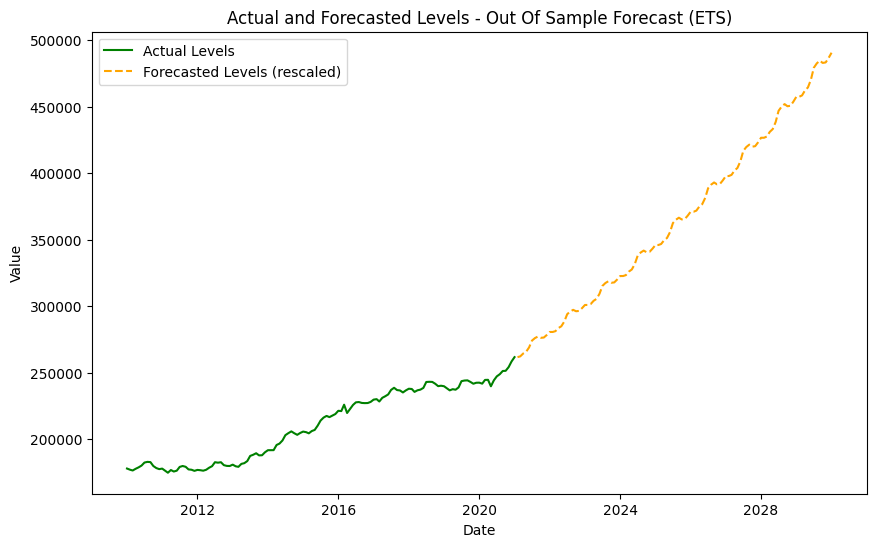

In [ ]:
# Calculate the cumulative factors for ETS forecast
cumulative_factors_ets = (1 + ETS_forecast / 100).cumprod()

# Use the same base value for both cumulative products
base_value = original_levels_df['AvgPriceUK_monthly'].iloc[-1]

# Calculate the forecasted levels for ETS
ETS_forecasted_levels = base_value * cumulative_factors_ets

# Calculate the scaling factor
scaling_factor = original_levels_df['AvgPriceUK_monthly'].iloc[-1] / ETS_forecasted_levels.iloc[0]

# Apply the scaling factor to forecasted levels
forecasted_rescaled = ETS_forecasted_levels * scaling_factor

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual levels
ax.plot(original_levels_df.index, original_levels_df['AvgPriceUK_monthly'], color='green', linestyle='-', label='Actual Levels')

# Plot forecasted levels (rescaled to match actual levels scale)
ax.plot(forecasted_rescaled.index, forecasted_rescaled, color='orange', linestyle='--', label='Forecasted Levels (rescaled)')

ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Actual and Forecasted Levels - Out Of Sample Forecast (ETS)')
ax.legend()

plt.show()


## Model Evaluation

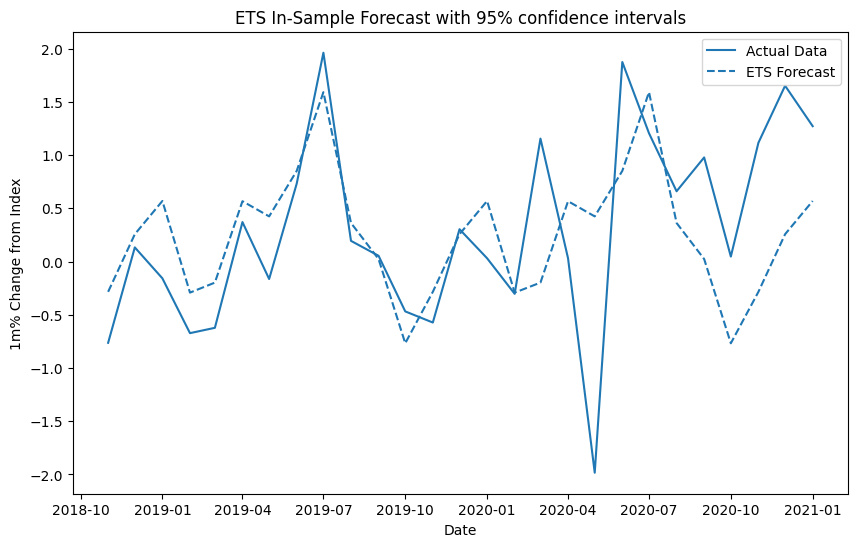

Root Mean Squared Error (RMSE): 0.80


In [ ]:
# Split the data_series into training and testing sets (80% for training)
train_data, test_data = train_test_split(data_series, test_size=0.2, shuffle=False)

# Fit the ETS model on the training data
ETS_model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12)
ETS_results = ETS_model.fit()

# Forecast future values (in-sample forecast, so steps match the length of test_data)
forecast_steps = len(test_data)
ETS_forecast = ETS_results.forecast(steps=forecast_steps)

# Plot the original data, forecast, and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data.values, label='Actual Data')
plt.plot(ETS_forecast.index, ETS_forecast.values, color='#1f77b4', linestyle='--', label='ETS Forecast')
plt.xlabel('Date')
plt.ylabel('1m% Change from Index')
plt.title('ETS In-Sample Forecast with 95% confidence intervals')
plt.legend()
plt.show()

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(test_data, ETS_forecast)
# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Epoch 1/100
4/4 [==============================] - 7s 145ms/step - loss: 0.1145
Epoch 2/100
4/4 [==============================] - 1s 183ms/step - loss: 0.0152
Epoch 3/100
4/4 [==============================] - 1s 352ms/step - loss: 0.0203
Epoch 4/100
4/4 [==============================] - 1s 149ms/step - loss: 0.0056
Epoch 5/100
4/4 [==============================] - 0s 104ms/step - loss: 0.0051
Epoch 6/100
4/4 [==============================] - 0s 100ms/step - loss: 0.0050
Epoch 7/100
4/4 [==============================] - 0s 103ms/step - loss: 0.0023
Epoch 8/100
4/4 [==============================] - 0s 102ms/step - loss: 0.0035
Epoch 9/100
4/4 [==============================] - 0s 108ms/step - loss: 0.0016
Epoch 10/100
4/4 [==============================] - 0s 104ms/step - loss: 0.0021
Epoch 11/100
4/4 [==============================] - 0s 107ms/step - loss: 0.0018
Epoch 12/100
4/4 [==============================] - 0s 105ms/step - loss: 0.0017
Epoch 13/100
4/4 [===================

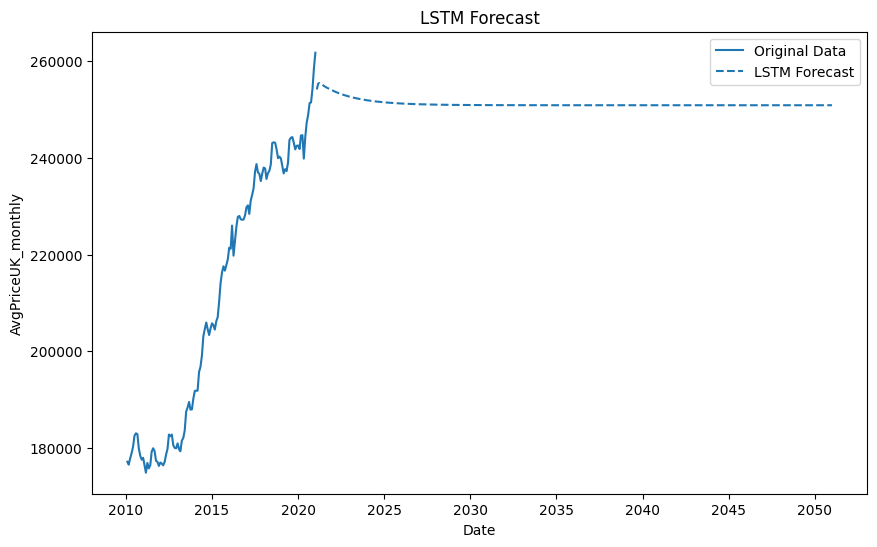

In [ ]:
# # Create KerasRegressor wrapper
# lstm_regressor = KerasRegressor(build_fn=create_lstm_model, verbose=0)

# # Define hyperparameters to search
# param_grid = {
#     'epochs': [50, 100],
#     'batch_size': [32, 64]
# }

# Assume you have additional independent variables 'Variable1' and 'Variable2'
independent_variables = ['GDP_monthly', 'IntRate_monthly','URate_monthly', 'CPIH_monthly','Population_monthly','ConsOutput_monthly']

# Normalize the additional independent variables
scaler_independent = MinMaxScaler()
data_independent_scaled = scaler_independent.fit_transform(data_df[independent_variables])

# Choose the column to model
column_name = 'AvgPriceUK_monthly'
data_series = data_df[column_name]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_series.values.reshape(-1, 1))

# Combine the scaled target variable with the scaled independent variables
data_combined_scaled = np.concatenate([data_scaled, data_independent_scaled], axis=1)

# Create sequences for LSTM with combined data
sequence_length = 12
sequences_combined = []
for i in range(len(data_combined_scaled) - sequence_length + 1):
    sequences_combined.append(data_combined_scaled[i:i+sequence_length])

sequences_combined = np.array(sequences_combined)

# Split into training and forecasting data
training_size = len(sequences_combined)
train_data_combined = sequences_combined[:training_size]

# Prepare training data
X_train_combined = train_data_combined[:, :-1]
y_train_combined = train_data_combined[:, -1]

# Create sequences for LSTM
sequence_length = 12
sequences = []
for i in range(len(data_scaled) - sequence_length + 1):
    sequences.append(data_scaled[i:i+sequence_length])

sequences = np.array(sequences)

# Split into training and forecasting data
training_size = len(sequences)  # Use all available data for training
train_data = sequences[:training_size]

# Prepare training data
X_train = train_data[:, :-1]
y_train = train_data[:, -1]


# # Create GridSearchCV instance
# grid_search = GridSearchCV(lstm_regressor, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=3)

# # Fit the GridSearchCV
# grid_search.fit(X_train, y_train)

# # Get the best estimator
# best_lstm_model = grid_search.best_estimator_

# Build and compile the model
model = Sequential()
model.add(LSTM(500, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Initialize forecast_input with the last sequence of training data
forecast_input = train_data[-1, 1:]

# Forecast steps ahead
forecast_steps = 12 * (2050 - 2021 + 1)  # Number of steps to forecast
forecasted_values = []

for _ in range(forecast_steps):
    # Reshape forecast input to match model input shape
    forecast_input_reshaped = forecast_input.reshape(1, forecast_input.shape[0], 1)

    # Predict next value
    next_value = model.predict(forecast_input_reshaped)
    forecasted_values.append(next_value)

    # Update forecast input for the next step
    forecast_input = np.concatenate([forecast_input[1:], next_value], axis=0)

# Convert the forecasted_values list to a numpy array
forecasted_values = np.array(forecasted_values)

# Rescale and inverse transform forecasted values
print("Shape of forecasted_values before inverse transform:", forecasted_values.shape)
forecasted_values = forecasted_values.reshape(-1, 1)
forecasted_values = scaler.inverse_transform(forecasted_values)
print("Shape of forecasted_values after inverse transform:", forecasted_values.shape)

# Plot the original data and LSTM forecast
plt.figure(figsize=(10, 6))
plt.plot(data_series.index, data_series.values, label='Original Data')
forecast_index = pd.date_range(start=data_series.index[-1], periods=forecast_steps+1, freq='MS')[1:]
plt.plot(forecast_index, forecasted_values, color='#1f77b4', linestyle='--', label='LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('AvgPriceUK_monthly')
plt.title('LSTM Forecast')
plt.legend()
plt.show()

In [ ]:
## PLACEHOLDER ##

# Model 4: VAR

## Forecast changes

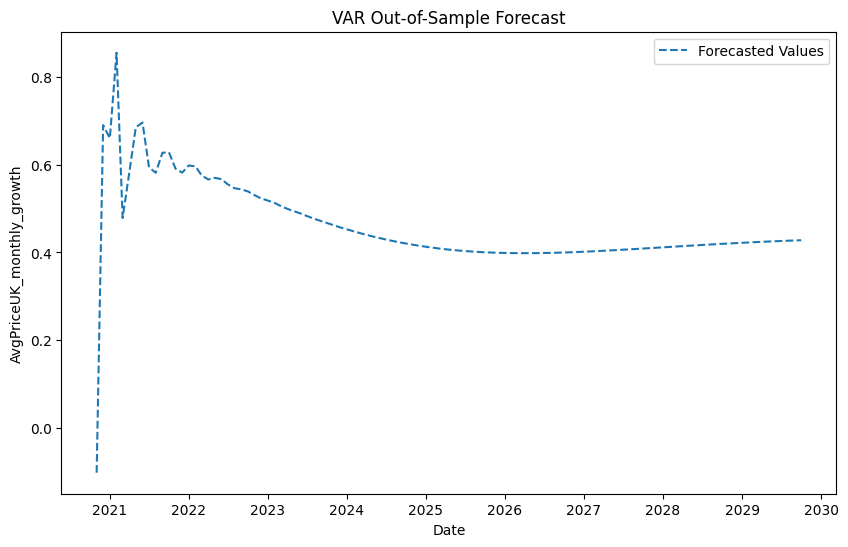

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import MinMaxScaler

# Choose the columns to model
target_column = 'AvgPriceUK_monthly_growth'
independent_variables = ['GDP_monthly_growth', 'IntRate_monthly', 'URate_monthly', 'CPIH_monthly_growth', 'Population_monthly_growth', 'ConsOutput_monthly_growth']

# Create a new DataFrame for easier manipulation
data_df_new = pd.DataFrame(data_df, columns=[target_column] + independent_variables)

# Number of lagged time steps
num_lags = 3

# Create lag features for the target and independent variables
for col in [target_column] + independent_variables:
    for i in range(1, num_lags + 1):
        data_df_new[f'{col}_lag_{i}'] = data_df_new[col].shift(i)

# Drop rows with missing values due to lag
data_df_new.dropna(inplace=True)

# Choose the columns for the VAR model
var_columns = [f'{col}_lag_{i}' for col in [target_column] + independent_variables for i in range(1, num_lags + 1)]

# Create a new DataFrame with only the selected columns
data_df_var = data_df_new[var_columns]

# Fit the VAR model
var_model = VAR(data_df_var)
var_results = var_model.fit(maxlags=num_lags, ic='aic')

# Generate lagged features for the first out-of-sample forecast
X_forecast = data_df_var[-num_lags:].values  # Use the last 'num_lags' rows of data as the initial forecast input

# Number of steps to forecast
forecast_steps = 108  # From 2021 to 2030

# Initialize an array to store forecasted values
forecasted_values = []

# Perform iterative out-of-sample forecasting
for step in range(forecast_steps):
    # Make predictions for the next step
    forecast_next_step = var_results.forecast(X_forecast, steps=1)
    forecasted_values.append(forecast_next_step[0, 0])

    # Update X_forecast for the next step
    X_forecast = np.roll(X_forecast, -1, axis=0)
    X_forecast[-1, :] = forecast_next_step[0]

# Create a time index for the forecast period
forecast_dates = pd.date_range(start=data_df_new.index[-num_lags], periods=forecast_steps, freq='MS')

# Plot the out-of-sample forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_dates, forecasted_values, label='Forecasted Values', linestyle='--')
plt.xlabel('Date')
plt.ylabel(target_column)
plt.title('VAR Out-of-Sample Forecast')
plt.legend()
plt.show()


## Change levels

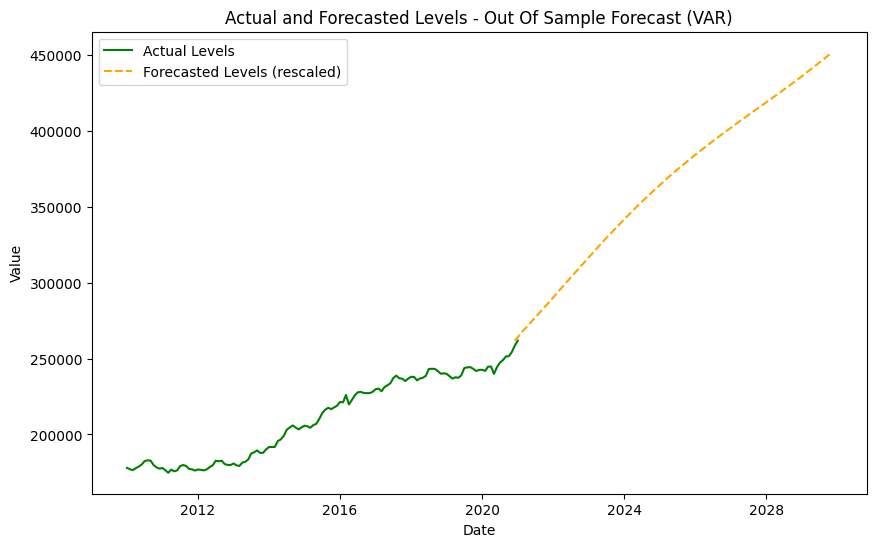

In [177]:
# Calculate the cumulative factors for VAR forecast
cumulative_factors_var = (1 + np.array(forecasted_values_var) / 100).cumprod()

# Use the same base value for both cumulative products
base_value = original_levels_df['AvgPriceUK_monthly'].iloc[-1]

# Calculate the forecasted levels for VAR
VAR_forecasted_levels = base_value * cumulative_factors_var

# Calculate the scaling factor
scaling_factor = original_levels_df['AvgPriceUK_monthly'].iloc[-1] / VAR_forecasted_levels[0]

# Apply the scaling factor to forecasted levels
forecasted_rescaled_var = VAR_forecasted_levels * scaling_factor

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual levels
ax.plot(original_levels_df.index, original_levels_df['AvgPriceUK_monthly'], color='green', linestyle='-', label='Actual Levels')

# Plot forecasted levels (rescaled to match actual levels scale)
ax.plot(forecast_dates_var, forecasted_rescaled_var, color='orange', linestyle='--', label='Forecasted Levels (rescaled)')

ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Actual and Forecasted Levels - Out Of Sample Forecast (VAR)')
ax.legend()
plt.show()


## Evaluation

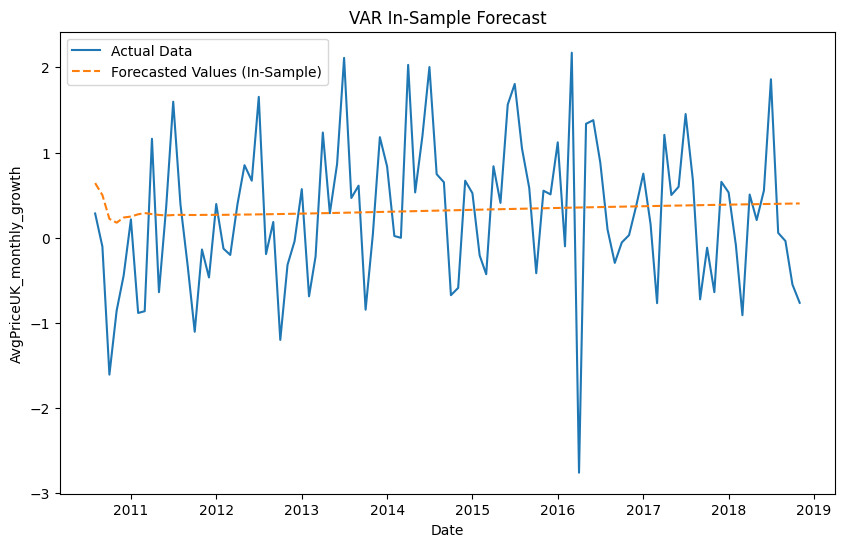

In-Sample Mean Squared Error (MSE): 0.73


In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import MinMaxScaler

# Choose the columns to model
target_column = 'AvgPriceUK_monthly_growth'
independent_variables = ['GDP_monthly_growth', 'IntRate_monthly', 'URate_monthly', 'CPIH_monthly_growth', 'Population_monthly_growth', 'ConsOutput_monthly_growth']

# Create a new DataFrame for easier manipulation
data_df_new = pd.DataFrame(data_df, columns=[target_column] + independent_variables)

# Number of lagged time steps
num_lags = 3

# Create lag features for the target and independent variables
for col in [target_column] + independent_variables:
    for i in range(1, num_lags + 1):
        data_df_new[f'{col}_lag_{i}'] = data_df_new[col].shift(i)

# Drop rows with missing values due to lag
data_df_new.dropna(inplace=True)

# Choose the columns for the VAR model
var_columns = [target_column] + [f'{col}_lag_{i}' for col in independent_variables for i in range(1, num_lags + 1)]

# Create a new DataFrame with only the selected columns
data_df_var = data_df_new[var_columns]
# print(data_df_var)

# Split the data into training and test sets
train_size = int(0.8 * len(data_df_var))
data_train, data_test = data_df_var[:train_size], data_df_var[train_size:]

# Fit the VAR model
var_model = VAR(data_train)
var_results = var_model.fit(maxlags=num_lags, ic='aic')

# Number of steps to forecast (in-sample period)
forecast_steps_insample = len(data_train) - num_lags

# Initialize an array to store forecasted values
actual_values_insample = data_train[target_column].iloc[num_lags:].values
forecasted_values_insample = []

# Perform in-sample forecasting
X_insample = data_train[:num_lags].values  # Use the first 'num_lags' rows of data as initial input

for step in range(forecast_steps_insample):
    # Make predictions for the next step
    forecast_next_step = var_results.forecast(X_insample, steps=1)
    forecasted_values_insample.append(forecast_next_step[0, 0])

    # Update X_insample for the next step
    X_insample = np.roll(X_insample, -1, axis=0)
    X_insample[-1, :] = forecast_next_step[0]

# Create a time index for the in-sample forecast period
forecast_dates_insample = pd.date_range(start=data_train.index[num_lags], periods=forecast_steps_insample, freq='MS')

# Plot the in-sample forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_dates_insample, actual_values_insample, label='Actual Data')
plt.plot(forecast_dates_insample, forecasted_values_insample, label='Forecasted Values (In-Sample)', linestyle='--')
plt.xlabel('Date')
plt.ylabel(target_column)
plt.title('VAR In-Sample Forecast')
plt.legend()
plt.show()

# Calculate the Mean Squared Error (MSE)
mse_insample = mean_squared_error(actual_values_insample, forecasted_values_insample)
print(f"In-Sample Mean Squared Error (MSE): {mse_insample:.2f}")


In [ ]:
# import numpy as np
# from sklearn.metrics import mean_squared_error
# import matplotlib.pyplot as plt
# from statsmodels.tsa.api import VAR
# import pandas as pd

# # Load your data and preprocess if needed
# # ...

# # Convert the 'Date' column to a datetime index
# data_df.index = pd.to_datetime(data_df.index)

# # Set the frequency of the datetime index
# data_df.index.freq = 'MS'  # Assuming monthly frequency

# # Choose the columns to model
# target_column = 'AvgPriceUK_monthly_growth'
# independent_variables = ['GDP_monthly_growth', 'IntRate_monthly', 'URate_monthly', 'CPIH_monthly_growth', 'Population_monthly_growth', 'ConsOutput_monthly_growth']

# # Create a new DataFrame for easier manipulation
# data_df_new = pd.DataFrame(data_df, columns=[target_column] + independent_variables)

# # Number of lagged time steps
# num_lags = 2

# # Create lag features for the target and independent variables
# for col in [target_column] + independent_variables:
#     for i in range(1, num_lags + 1):
#         data_df_new[f'{col}_lag_{i}'] = data_df_new[col].shift(i)

# # Drop rows with missing values due to lag
# data_df_new.dropna(inplace=True)

# # Choose the columns for the VAR model
# var_columns = [f'{col}_lag_{i}' for col in [target_column] + independent_variables for i in range(1, num_lags + 1)]

# # Create a new DataFrame with only the selected columns
# data_df_var = data_df_new[var_columns]

# # Fit the VAR model
# var_model = VAR(data_df_var)
# var_results = var_model.fit(maxlags=4, ic='aic')

# # # In-sample evaluation period (2010-2021)
# # eval_start = '2010-01-01'
# # eval_end = '2021-01-01'

# # eval_data = data_df_var[eval_start:eval_end]
# # print(eval_data)

# # forecasted_values_insample = []
# # actual_values_insample = eval_data[target_column]

# # num_eval_steps = len(eval_data)
# # lagged_features_insample = eval_data.iloc[-num_lags:, :].values

# # for step in range(num_eval_steps):
# #     forecast_next_step = var_results.forecast(lagged_features_insample, steps=1)
# #     forecasted_values_insample.append(forecast_next_step[0][0])
# #     lagged_features_insample = np.roll(lagged_features_insample, -1, axis=0)
# #     lagged_features_insample[-1, :] = forecast_next_step[0]

# # mse_insample = mean_squared_error(actual_values_insample, forecasted_values_insample)
# # rmse_insample = np.sqrt(mse_insample)
# # print(f"In-Sample Root Mean Squared Error (RMSE): {rmse_insample:.2f}")

# # forecast_dates_insample = pd.date_range(start=eval_data.index[0], periods=num_eval_steps, freq='MS')

# # plt.figure(figsize=(10, 6))
# # plt.plot(forecast_dates_insample, actual_values_insample, label='Actual Data')
# # plt.plot(forecast_dates_insample, forecasted_values_insample, color='#1f77b4', linestyle='--', label='VAR Forecast (In-Sample)')
# # plt.xlabel('Date')
# # plt.ylabel(target_column)
# # plt.title('VAR In-Sample Forecast')
# # plt.legend()
# # plt.show()


# Model 5: Random Forests

Random Forest is a different approach than time series models like SARIMA and LSTM. It might not capture temporal dependencies as effectively, but it can still provide useful forecasts, especially when you have multiple features with varying relationships. You may need to experiment with hyperparameters, feature selection, and other aspects to achieve the best results for your specific dataset and forecasting goals.

## Evaluation


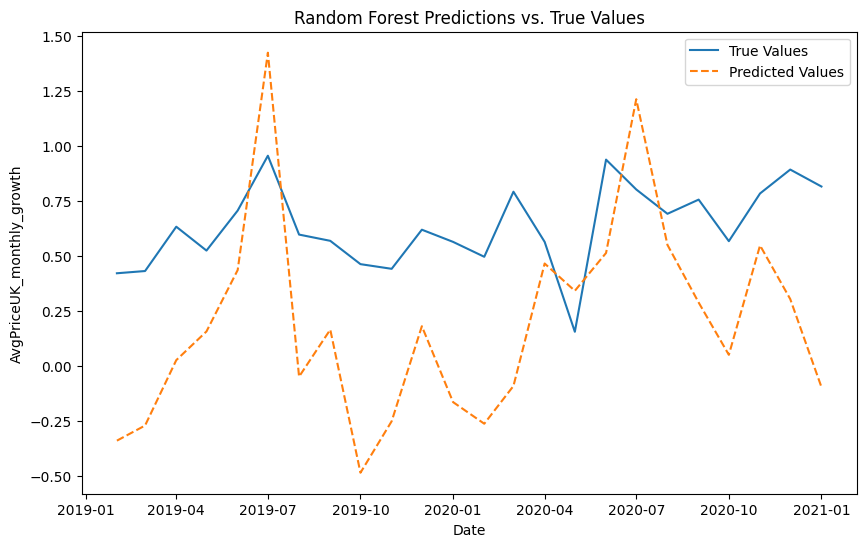

Root Mean Squared Error (RMSE): 0.58


In [ ]:
# Choose the columns to model
target_column = 'AvgPriceUK_monthly_growth'
independent_variables = ['GDP_monthly_growth', 'IntRate_monthly', 'URate_monthly', 'CPIH_monthly_growth', 'Population_monthly_growth', 'ConsOutput_monthly_growth']

# Create a new DataFrame for easier manipulation
data_df_new = pd.DataFrame(data_df, columns=[target_column] + independent_variables)

# Number of lagged time steps
num_lags = 12

# Create lag features for the target variable
for i in range(1, num_lags + 1):
    data_df_new[f'{target_column}_lag_{i}'] = data_df_new[target_column].shift(i)

# Create lag features for independent variables
for column in independent_variables:
    for i in range(1, num_lags + 1):
        data_df_new[f'{column}_lag_{i}'] = data_df_new[column].shift(i)

# Drop rows with missing values due to lag
data_df_new.dropna(inplace=True)

# Prepare lagged features and target variable
lagged_features = [f'{target_column}_lag_{i}' for i in range(1, num_lags + 1)] + \
                  [f'{col}_lag_{i}' for col in independent_variables for i in range(1, num_lags + 1)]
X = data_df_new[lagged_features]
y = data_df_new[target_column]

# All data is training data for out-of-sample forecasting

# Normalize lagged features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Normalize target variable
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split the data into training and test sets
train_size = int(0.8 * len(data_df_new))
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15, min_samples_leaf= 1) # based on below
rf_model.fit(X_train, y_train.ravel())

# Make predictions on the test set
y_pred_scaled = rf_model.predict(X_test)

# Inverse transform predictions to get original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Plot the original data and predicted values
plt.figure(figsize=(10, 6))
plt.plot(data_df_new.index[train_size:], y_test, label='True Values')
plt.plot(data_df_new.index[train_size:], y_pred, label='Predicted Values', linestyle='--')
plt.xlabel('Date')
plt.ylabel(target_column)
plt.title('Random Forest Predictions vs. True Values')
plt.legend()
plt.show()


# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

## Fine tuning

In [ ]:
# Define Hyperparameter Grid:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 5, 10]
}

# Perform Grid Search: Use GridSearchCV from scikit-learn to perform an exhaustive search over the defined parameter grid.
# This will fit and evaluate the model for all possible combinations of hyperparameters
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Using negative MSE as a scoring metric
                           cv=5)  # Number of cross-validation folds

grid_search.fit(X_train, y_train.ravel())
# Find Best Parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_model = grid_search.best_estimator_
# Evaluate on Test Set: Evaluate the best model on the test set and calculate the RMSE:
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
print(f"Best RMSE: {rmse_best:.2f}")


Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 100}
Best RMSE: 0.16


## Forecast changes


You've selected the target column as 'AvgPriceUK_monthly_growth' and the independent variables as ['GDP_monthly_growth', 'IntRate_monthly', 'URate_monthly', 'CPIH_monthly_growth', 'Population_monthly_growth', 'ConsOutput_monthly_growth'].

You're normalizing the target and independent variables using MinMaxScaler.

You're creating sequences of data for training your model. Each sequence has a length of sequence_length, which appears to be set to 12. These sequences will be used as input features for training your model.

You're creating the sequences by iterating through your scaled data and creating overlapping segments of length sequence_length.

You're storing these sequences in the sequences_combined array.

Overall, this code seems to be a good starting point for your recursive forecasting using a Random Forest model.

Remember that recursive forecasting involves making predictions one step at a time, where each prediction is incorporated into the input for the next prediction. This iterative process can be computationally expensive, but it helps capture the evolving dynamics of the target variable.

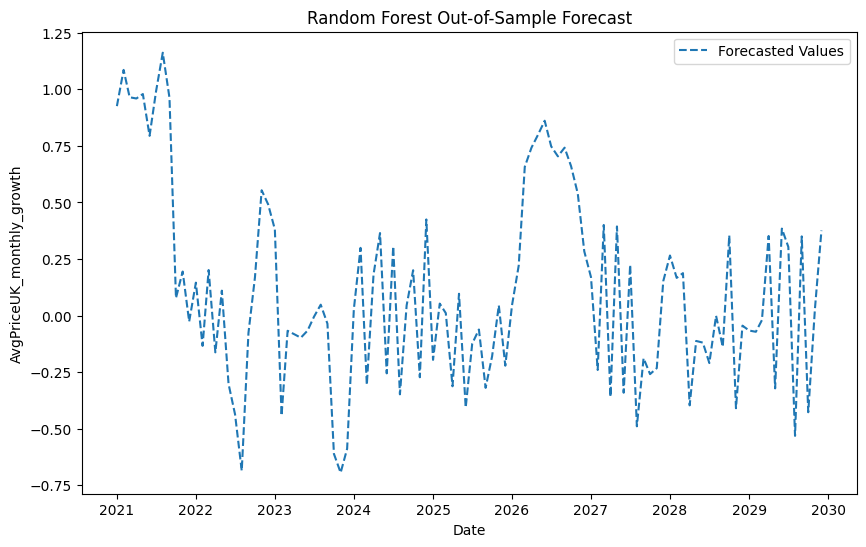

In [ ]:

# Choose the columns to model
target_column = 'AvgPriceUK_monthly_growth'
independent_variables = ['GDP_monthly_growth', 'IntRate_monthly', 'URate_monthly', 'CPIH_monthly_growth', 'Population_monthly_growth', 'ConsOutput_monthly_growth']

# Create a new DataFrame for easier manipulation
data_df_new = pd.DataFrame(data_df, columns=[target_column] + independent_variables)

# Number of lagged time steps
num_lags = 12

# Create lag features for the target variable
for i in range(1, num_lags + 1):
    data_df_new[f'{target_column}_lag_{i}'] = data_df_new[target_column].shift(i)

# Create lag features for independent variables
for column in independent_variables:
    for i in range(1, num_lags + 1):
        data_df_new[f'{column}_lag_{i}'] = data_df_new[column].shift(i)

# Drop rows with missing values due to lag
data_df_new.dropna(inplace=True)

# Prepare lagged features and target variable
lagged_features = [f'{target_column}_lag_{i}' for i in range(1, num_lags + 1)] + \
                  [f'{col}_lag_{i}' for col in independent_variables for i in range(1, num_lags + 1)]
X = data_df_new[lagged_features]
y = data_df_new[target_column]

# Normalize lagged features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Normalize target variable
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15, min_samples_leaf= 1) # chosoe params based on above
rf_model.fit(X_scaled, y_scaled.ravel())

# Generate lagged features for the first out-of-sample forecast
X_forecast = X_scaled[-1, :].reshape(1, -1)

# Number of steps to forecast
forecast_steps = 108  # From 2021 to 2030

# Initialize an array to store forecasted values
forecasted_values = []

# Perform iterative out-of-sample forecasting
for step in range(forecast_steps):
    # Make predictions for the next step
    y_forecast_scaled = rf_model.predict(X_forecast)

    # Inverse transform prediction to get original scale
    y_forecast = scaler_y.inverse_transform(y_forecast_scaled.reshape(-1, 1))

    # Append the forecasted value to the array
    forecasted_values.append(y_forecast[0, 0])

    # Update X_forecast for the next step
    X_forecast = np.roll(X_forecast, -1)
    X_forecast[0, -num_lags:] = y_forecast_scaled

# Create a time index for the forecast period
forecast_dates = pd.date_range(start=data_df_new.index[-1], periods=forecast_steps, freq='MS')

# Plot the out-of-sample forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_dates, forecasted_values, label='Forecasted Values', linestyle='--')
plt.xlabel('Date')
plt.ylabel(target_column)
plt.title('Random Forest Out-of-Sample Forecast')
plt.legend()
plt.show()


## Levels

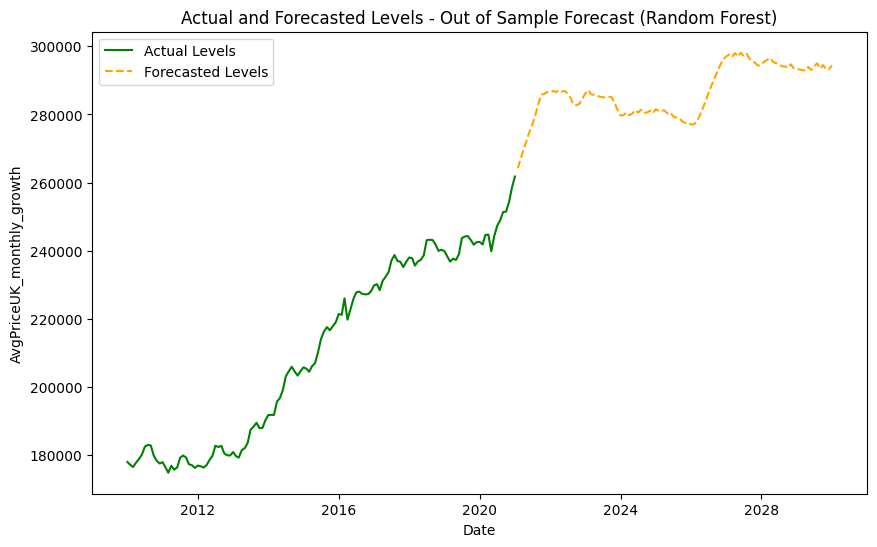

In [ ]:

# Convert forecasted_values list to a NumPy array
forecasted_values = np.array(forecasted_values)

# Calculate the cumulative factors for the forecasted changes
cumulative_factors_rf = (1 + forecasted_values / 100).cumprod()

# Use the same base value for both cumulative products
base_value = original_levels_df['AvgPriceUK_monthly'].iloc[-1]

# Calculate the forecasted levels for the Random Forest forecast
forecasted_levels_rf = base_value * cumulative_factors_rf

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the original levels
ax.plot(original_levels_df.index, original_levels_df['AvgPriceUK_monthly'], color='green', linestyle='-', label='Actual Levels')

# Plot the forecasted levels
ax.plot(forecast_dates, forecasted_levels_rf, color='orange', linestyle='--', label='Forecasted Levels')

ax.set_xlabel('Date')
ax.set_ylabel(target_column)
ax.set_title('Actual and Forecasted Levels - Out of Sample Forecast (Random Forest)')
ax.legend()

plt.show()
